In [1]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [3]:
!pip install pydot


In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [13]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier




In [8]:
!pip install tensorflow==2.7.0

In [14]:
(x_train_digit,y_train_digit),(x_test_digit,y_test_digit)=mnist.load_data()

11501568/11490434 [==============================] - 8s 1us/step


In [15]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [16]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
x_test_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [18]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

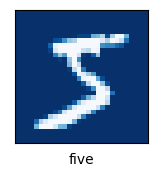

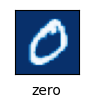

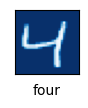

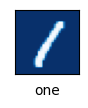

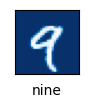

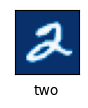

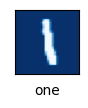

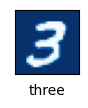

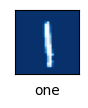

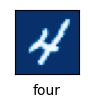

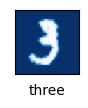

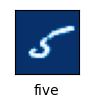

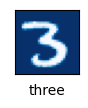

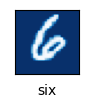

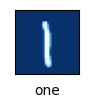

In [21]:
col_names=['zero','one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i],cmap='Blues_r')
    plt.xlabel(col_names[y_train_digit[i]])
    plt.show()

In [23]:
x_train_digit.shape

(60000, 28, 28)

In [24]:
x_train_digit=x_train_digit.reshape(60000,784)
x_test_digit=x_test_digit.reshape(10000,784)

In [28]:
x_train_digit.shape

(60000, 784)

In [27]:
x_test_digit.shape

(10000, 784)

In [29]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [31]:
y_train_digit= to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)

In [33]:
y_train_digit.shape

(60000, 10)

In [34]:
y_test_digit.shape

(10000, 10)

In [36]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [37]:
y_test_digit[1]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
from keras import layers
from keras.models import Sequential

model = Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])


In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 64)                16448     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [49]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 1.3913 - accuracy: 0.8549 - val_loss: 0.3713 - val_accuracy: 0.9101
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2849 - accuracy: 0.9278 - val_loss: 0.2739 - val_accuracy: 0.9296
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1880 - accuracy: 0.9479 - val_loss: 0.2343 - val_accuracy: 0.9402
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1507 - accuracy: 0.9576 - val_loss: 0.1989 - val_accuracy: 0.9496
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.1272 - accuracy: 0.9631 - val_loss: 0.2381 - val_accuracy: 0.9490
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1128 - accuracy: 0.9676 - val_loss: 0.1875 - val_accuracy: 0.9517
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1109 - accuracy: 0.9681 - val_loss: 0.2118 - val_accuracy: 0.9527
Epoch 

In [50]:
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [51]:
history=model.fit(x_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(x_test_digit,y_test_digit))

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.0467 - accuracy: 0.9859 - val_loss: 0.1279 - val_accuracy: 0.9736
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.1322 - val_accuracy: 0.9729
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0221 - accuracy: 0.9931 - val_loss: 0.1297 - val_accuracy: 0.9740
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0182 - accuracy: 0.9940 - val_loss: 0.1349 - val_accuracy: 0.9741
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.1350 - val_accuracy: 0.9762
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.1406 - val_accuracy: 0.9765
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0108 - accuracy: 0.9968 - val_loss: 0.1439 - val_accuracy: 0.9759
Epoch 

In [52]:
y_predict=model.predict(x_test_digit)

In [60]:
y_predict[0]

array([3.0544698e-03, 3.5902172e-02, 9.9315345e-01, 9.9975163e-01,
       4.7492981e-03, 7.5735223e-01, 5.1990628e-06, 1.0000000e+00,
       3.9720768e-01, 9.5903295e-01], dtype=float32)

In [61]:
y_predicts=np.argmax(y_predict,axis=1)


In [62]:
y_predicts

array([7, 2, 1, ..., 4, 3, 5], dtype=int64)

In [63]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [64]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

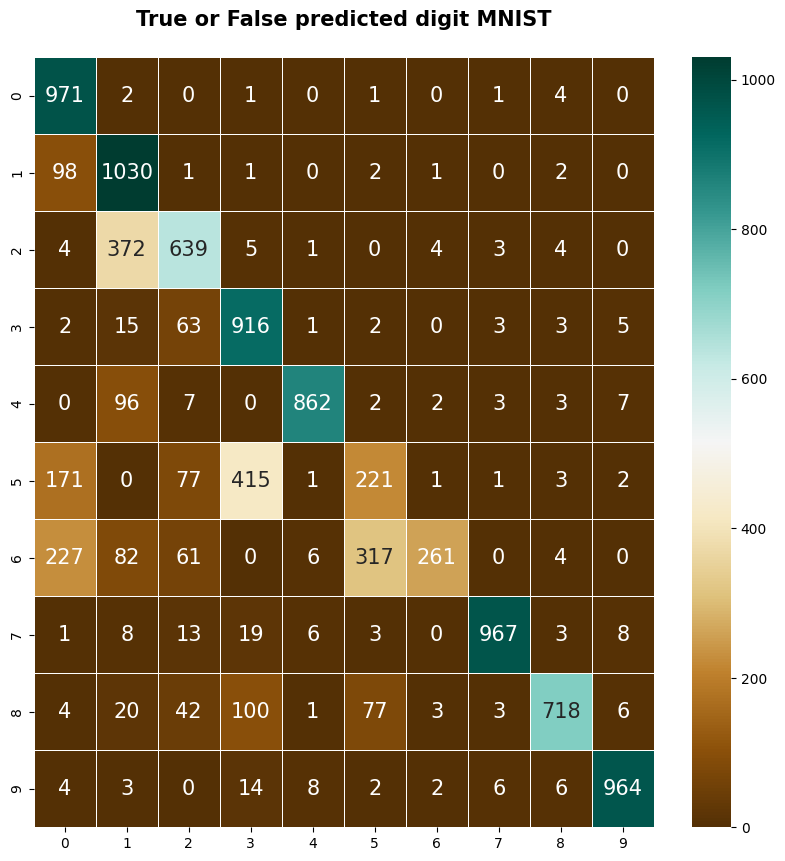

In [76]:
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="BrBG")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [70]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.66      0.99      0.79       980
           1       0.63      0.91      0.75      1135
           2       0.71      0.62      0.66      1032
           3       0.62      0.91      0.74      1010
           4       0.97      0.88      0.92       982
           5       0.35      0.25      0.29       892
           6       0.95      0.27      0.42       958
           7       0.98      0.94      0.96      1028
           8       0.96      0.74      0.83       974
           9       0.97      0.96      0.96      1009

    accuracy                           0.75     10000
   macro avg       0.78      0.75      0.73     10000
weighted avg       0.78      0.75      0.74     10000



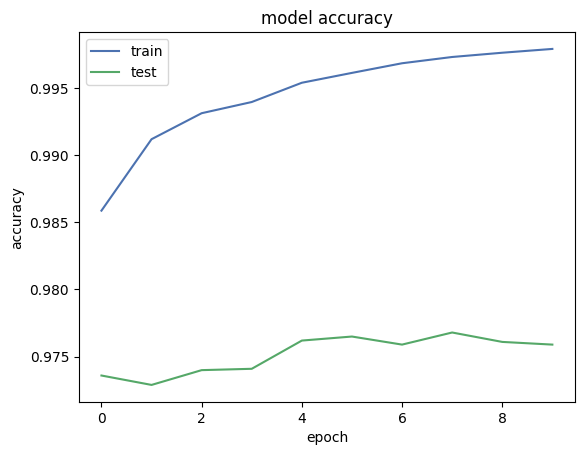

In [80]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='best')
plt.show()

In [81]:
y_predict_single=model.predict(x_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single,axis=1)
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

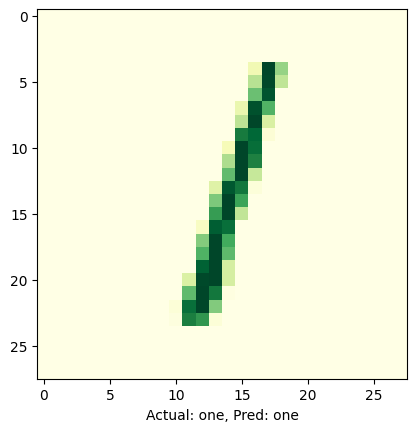

In [91]:
import numpy as np
import matplotlib.pyplot as plt

col_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Assuming x_test_digit, y_test_digit, and y_predict_single are properly defined
plt.imshow(x_test_digit[2].reshape(28, 28), cmap='YlGn')

# Get the true label index (from one-hot encoded vector)
true_label = np.argmax(y_test_digit[2])

# Ensure the predicted label is a scalar (index of predicted class)
predicted_label = np.argmax(y_predict_single[0])  # In case it's a vector, use np.argmax to extract the index

# Set the xlabel with the actual and predicted class names
plt.xlabel("Actual: {}, Pred: {}".format(col_names[true_label], col_names[predicted_label]))
plt.show()
